In [60]:
import numpy as np
import math
import random
import time
import matplotlib.pyplot as plt

In [61]:
def means(features):
    num_columns = len(features[0])
    means = [sum(col) / len(col) for col in zip(*features)]
    return means

In [62]:
def stds(features, means_):
    num_columns = len(features[0])
    stds_ = []
    num_rows = len(features)
    for i in range(num_columns):
        sum_squared_diff = 0
        for j in range(num_rows):
            squared_diff = (features[j][i] - means_[i]) ** 2
            sum_squared_diff += squared_diff
        column_std = math.sqrt(sum_squared_diff / (num_rows- 1))
        stds_.append(column_std)
    return stds_

In [63]:
def normalize(features):
    means_ = means(features)
    stds_ = stds(features, means_)
    num_columns = len(features[0])
    num_rows = len(features)
    for i in range(num_rows):
        for j in range(num_columns):
            features[i][j] = (features[i][j] - means_[j]) / stds_[j]
    return features

In [64]:
def euclidean_distance(sample1, sample2, feats):
    e_dist = 0
    for f in feats:
        e_dist += math.pow((sample1[f] - sample2[f]), 2)
    return math.sqrt(e_dist)

In [65]:
def nearest_N(train, test, feats):
    distances = []
    for sample_t in train:
        e_dist = euclidean_distance(sample_t, test, feats)
        distances.append([e_dist, sample_t[0]])
    distances = sorted(distances, key=lambda x: x[0])
    return distances[0][1]

In [66]:
def accuracy(dataset, features, k):
    count = 0
    total = 0
    curr_feats = features[:]
    n = len(dataset)//k
    for i in range(k):
        test = dataset[i*n:(i+1)*n]
        train = dataset[:i*n] + dataset[(i+1)*n:]
        for t in (test):
            cls = nearest_N(train, t, curr_feats)
            total += 1
            if (cls == t[0]):
                count += 1
    acc = float(count) / total
    return acc

In [67]:
def plot(acc_list, feat_list):
  plt.plot(feat_list, acc_list)
  plt.xlabel('# of features')
  plt.ylabel('accuracy')
  plt.title('Accuracy vs # of features')
  plt.show()

In [68]:
def forward_selection(dataset, selected_features, final_features, final_acc, k):
    s_time = time.process_time()
    num_features = len(dataset[0])
    selected_features = selected_features[:]
    acc_list = []
    feat_list = []
    acc_feat = []
    acc = final_acc
    while(True):
      acc_list.append(round(acc*100, 1))
      feat_list.append(len(selected_features))
      if(len(selected_features) == len(dataset[0]) - 1):
        e_time = time.process_time()
        t = e_time - s_time
        acc_feat.append(acc_list)
        acc_feat.append(feat_list)
        return final_features, final_acc, t, acc_feat
      current_features = []
      print('selected features:', selected_features)
      print('finalized features:', final_features)
      print('final accuracy:', round(final_acc*100, 1),'%')
      for n in range(1, num_features):
          prev_features = selected_features[:]
          if n not in selected_features:
              prev_features.append(n)
              acc = accuracy(dataset, prev_features, k)
              temp = []
              temp.append(acc)
              temp.append(n)
              current_features.append(temp)
              print('for feature', n,'=> the accuracy is:', round(acc*100, 1),'%')
      current_features = sorted(current_features, key=lambda x: x[0], reverse=True)
      #print(current_features[0][1])
      selected_features.append(current_features[0][1])
      acc = current_features[0][0]
      if(acc>final_acc):
          final_features.append(current_features[0][1])
          final_acc = acc
    #print(selected_features, final_features, final_acc)
    #return forward_selection(dataset, selected_features, final_features, final_acc, k)

In [69]:
def backward_elimination(dataset, selected_features, final_features, final_acc, k):
    s_time = time.process_time()
    num_features = len(dataset[0])
    selected_features = selected_features[:]
    acc_list = []
    feat_list = []
    acc_feat = []
    acc = final_acc
    while(True):
      acc_list.append(round(acc*100, 1))
      feat_list.append(len(selected_features))
      if(len(selected_features) == 0):
        e_time = time.process_time()
        t = e_time - s_time
        acc_feat.append(acc_list)
        acc_feat.append(feat_list)
        return final_features, final_acc, t, acc_feat
      current_features = []
      print('selected features:', selected_features)
      print('finalized features:', final_features)
      print('final accuracy:', round(final_acc*100, 1),'%')
      for n in range(1, num_features):
          prev_features = selected_features[:]
          if n in selected_features:
              prev_features.remove(n)
              acc = accuracy(dataset, prev_features, k)
              temp = []
              temp.append(acc)
              temp.append(n)
              current_features.append(temp)
              print('for feature', n,'=> the accuracy is:', round(acc*100, 1),'%')
      current_features = sorted(current_features, key=lambda x: x[0], reverse=True)
      #print(current_features[0][1])
      selected_features.remove(current_features[0][1])
      acc = current_features[0][0]
      if(acc>final_acc):
          final_features.remove(current_features[0][1])
          final_acc = acc
    #print(selected_features, final_features, final_acc)
    #return backward_elimination(dataset, selected_features, final_features, final_acc, k)

In [70]:
def main():
    print("Wecome to the feature selector platform.\n")
    print("\nYou can choose any of two types of dataset:")
    print("1. Small dataset in data_sets folder.")
    print("2. Large dataset in data_sets folder.")
    print("3. Extra large dataset in data_sets folder.")
    print("4. A real life dataset: glass.data.")
    dataset_type = input('Please enter the correspoinding number for the dataset type: ')

    data_path = ''
    if(dataset_type == '1'):
      data_path = '/content/data_sets/CS170_small_Data__12.txt'   
    if(dataset_type == '2'):
      data_path = '/content/data_sets/CS170_large_Data__11.txt'  
    if(dataset_type == '3'):
      data_path = '/content/data_sets/CS170_XXXlarge_Data__21.txt'   
    if(dataset_type == '4'):
      data_path = '/content/glass.data'           
    

    dataset = None
    if(dataset_type != '4'):
        print("\nloading data...\n")
        with open(data_path, 'r') as file:
            rows = file.readlines()
        classes = []
        features = []
        for row in rows:
            data = row.strip().split()
            cls = float(data.pop(0))
            classes.append(cls)
            feature = [float(ftr) for ftr in data[:]]
            features.append(feature)
        print("normalizing data...\n")
        features = normalize(features)

        dataset = np.array(features)
        dataset = np.insert(dataset, 0, classes, axis=1).tolist()
    else:
        print('loading data...')
        with open(data_path, 'r') as file:
            rows = file.read().split('\n')
        rows = rows[:len(rows)-1]
        classes = []
        features = []
        print(len(rows))
        for row in rows:
            data = row.strip().split(',')
            cls = float(data.pop())
            classes.append(cls)
            feature = [float(ftr) for ftr in data[:]]
            feature = feature[1:]
            features.append(feature)

        print("normalizing data...\n")
        features = normalize(features)

        dataset = np.array(features)
        dataset = np.insert(dataset, 0, classes, axis=1).tolist()

    print("The dataset has:", len(dataset[0]), 'features and', len(dataset), 'instances')
                         
    print("\nYou can choose one of the following algorithms:")
    print("1. Forward selection.")
    print("2. Backward elimination.")
    algo = input("Please enter the correspoinding number for the chosen algorithm: ")
    
    final_features = None
    final_acc = 0
    t = 0
    acc_feat = None
    if(algo == '1'):
        print("starting the forward selection approach...")
        if(dataset_type == '3'):
          final_features, final_acc, t, acc_feat = forward_selection(dataset, [], [], 0, 2)
        else:
          final_features, final_acc, t, acc_feat = forward_selection(dataset, [], [], 0, len(dataset))
        print('\n\nfinally, the finalized features and accuracy are:')
        print(final_features, round(final_acc*100, 1),'%')
        print("forward selection approach ended!\n\n")
    if(algo == '2'):
        print("starting the backward elimination approach...")
        initial_features = [i for i in range(1, len(dataset[0]))]
        inital_final_features = initial_features[:]
        if(dataset_type == '3'):
          acc = accuracy(dataset, initial_features, 2)
          final_features, final_acc, t, acc_feat = backward_elimination(dataset, initial_features, inital_final_features, acc, 2)
        else:
          acc = accuracy(dataset, initial_features, len(dataset))
          final_features, final_acc, t, acc_feat = backward_elimination(dataset, initial_features, inital_final_features, acc, len(dataset))
        print()
        print()
        print('finally, the finalized features and accuracy are:')
        print(final_features, round(final_acc*100, 1),'%')
        print("backward elimination approach ended!\n\n")
    print("required time:", round(t, 1))
    plot(acc_feat[0], acc_feat[1])

In [ ]:
if __name__=="__main__":
    main()

Wecome to the feature selector platform.


You can choose any of two types of dataset:
1. Small dataset in data_sets folder.
2. Large dataset in data_sets folder.
3. Extra large dataset in data_sets folder.
4. A real life dataset: glass.data.
Please enter the correspoinding number for the dataset type: 3

loading data...

normalizing data...

The dataset has: 81 features and 4000 instances

You can choose one of the following algorithms:
1. Forward selection.
2. Backward elimination.
Please enter the correspoinding number for the chosen algorithm: 1
starting the forward selection approach...
selected features: []
finalized features: []
final accuracy: 0 %
for feature 1 => the accuracy is: 68.8 %
for feature 2 => the accuracy is: 69.2 %
for feature 3 => the accuracy is: 68.4 %
for feature 4 => the accuracy is: 68.7 %
for feature 5 => the accuracy is: 67.9 %
for feature 6 => the accuracy is: 68.6 %
for feature 7 => the accuracy is: 67.6 %
for feature 8 => the accuracy is: 68.7 %
for feat

Wecome to the feature selector platform.


You can choose any of two types of dataset:
1. Small dataset in data_sets folder.
2. Large dataset in data_sets folder.
3. Extra large dataset in data_sets folder.
4. A real life dataset: glass.data.
Please enter the correspoinding number for the dataset type: 1

loading data...

normalizing data...

The dataset has: 11 features and 1000 instances

You can choose one of the following algorithms:
1. Forward selection.
2. Backward elimination.
Please enter the correspoinding number for the chosen algorithm: 1
starting the forward selection approach...
selected features: []
finalized features: []
final accuracy: 0 %
for feature 1 => the accuracy is: 83.4 %
for feature 2 => the accuracy is: 69.4 %
for feature 3 => the accuracy is: 69.8 %
for feature 4 => the accuracy is: 69.6 %
for feature 5 => the accuracy is: 67.2 %
for feature 6 => the accuracy is: 71.8 %
for feature 7 => the accuracy is: 66.5 %
for feature 8 => the accuracy is: 65.2 %
for feat

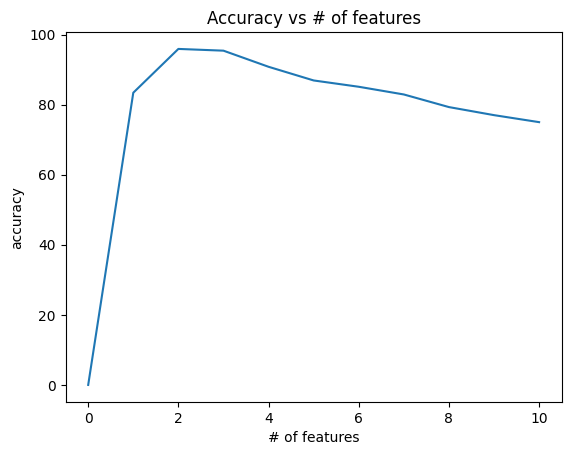

In [73]:
if __name__=="__main__":
    main()

In [ ]:
if __name__=="__main__":
    main()

In [ ]:
if __name__=="__main__":
    main()
    